In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
designs=pd.read_csv("output_results/results.csv")

In [5]:
designs.head()

,sequence,predicted_structure,source,shape_profile,target_structure,jaccard,structure_match
0,AAUAAUAAAACCCCUAAGAAUACGCCACCAAUAAAGACCCCUCCAU...,..........(((((.......(.((((((.......[[[[[[[((...,RNA_replicase_target,"[0.1921742856502533, 0.49740880727767944, 0.65...",..........(((((.........(((((......[.[[[[[[[((...,0.734694,False
1,AAAAAUAAAACUCUCAAUAAAAUACCACCAAUAAACAGGCACCAUC...,..........(((((.........(((((........[[[[[[[[[...,RNA_replicase_target,"[0.0884426087141037, 0.36166197061538696, 0.62...",..........(((((.........(((((......[.[[[[[[[((...,0.590909,False
2,AAAAAUAAAUCUACCAAUAAAAUACCAGCAAUAUACACGAGCCCCU...,.........((((((.........(((((........[[[[[[[[[...,RNA_replicase_target,"[0.048483945429325104, 0.22948113083839417, 0....",..........(((((.........(((((......[.[[[[[[[((...,0.607143,False
3,GAAAAUAAAACCUCCAACAAAUAACCACCAAUAAACAGCAUCCCCU...,..........(((((.........(((((........[[[[[[[[....,RNA_replicase_target,"[0.37059974670410156, 0.17808657884597778, 0.5...",..........(((((.........(((((......[.[[[[[[[((...,0.622642,False
4,AAAAAUAAAACCUCCAAGAAAUAACCACCAAUAAUCACUACCCCGC...,..........(((((.[[[.....(((((........[[[[[[[((...,RNA_replicase_target,"[0.06383568048477173, 0.22044406831264496, 0.6...",..........(((((.........(((((......[.[[[[[[[((...,0.720000,False


In [6]:
designs.columns

Index(['sequence', 'predicted_structure', 'source', 'shape_profile',
       'target_structure', 'jaccard', 'structure_match'],
      dtype='object')

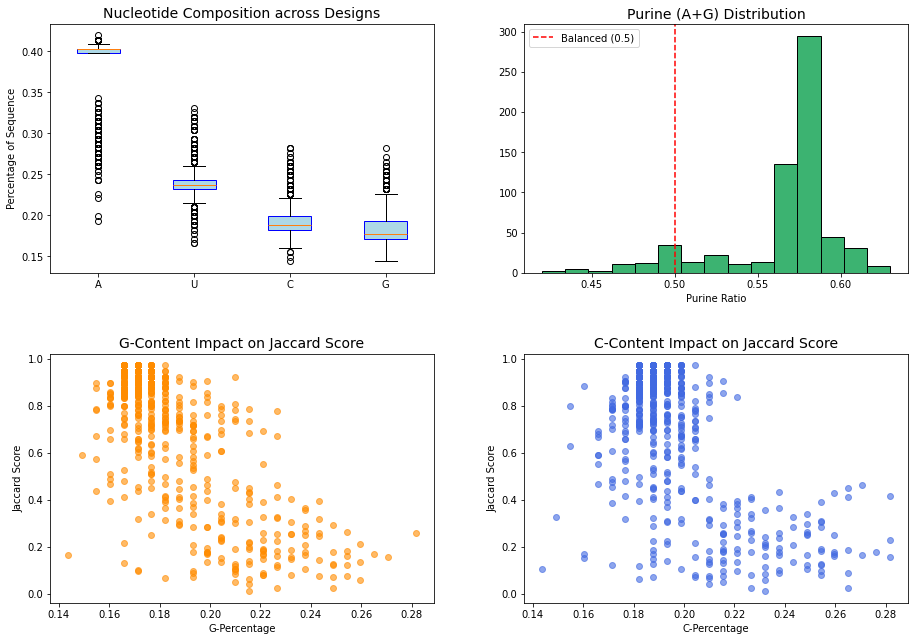

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Nucleotide Counting ---
# Calculating individual base percentages
for base in ['A', 'U', 'C', 'G']:
    designs[f'{base}_pct'] = designs['sequence'].apply(
        lambda x: x.count(base) / len(x) if len(x) > 0 else 0
    )

# Purine (A+G) vs Pyrimidine (U+C)
designs['purine_pct'] = designs['A_pct'] + designs['G_pct']

# --- 2. Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=6.0)

# Plot 1: Nucleotide Composition Boxplot
# Shows the range and median for each base across all designs
base_data = [designs['A_pct'], designs['U_pct'], designs['C_pct'], designs['G_pct']]
axes[0, 0].boxplot(base_data, labels=['A', 'U', 'C', 'G'], patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='blue'))
axes[0, 0].set_title('Nucleotide Composition across Designs', fontsize=14)
axes[0, 0].set_ylabel('Percentage of Sequence')

# Plot 2: Purine vs Pyrimidine Balance
# Balanced RNA usually sits around 0.5
axes[0, 1].hist(designs['purine_pct'], bins=15, color='mediumseagreen', edgecolor='black')
axes[0, 1].axvline(0.5, color='red', linestyle='--', label='Balanced (0.5)')
axes[0, 1].set_title('Purine (A+G) Distribution', fontsize=14)
axes[0, 1].set_xlabel('Purine Ratio')
axes[0, 1].legend()

# Plot 3: G-Content vs. Structural Accuracy
# High G-content can lead to G-quadruplexes which disrupt target folding
axes[1, 0].scatter(designs['G_pct'], designs['jaccard'], color='darkorange', alpha=0.6)
axes[1, 0].set_title('G-Content Impact on Jaccard Score', fontsize=14)
axes[1, 0].set_xlabel('G-Percentage')
axes[1, 0].set_ylabel('Jaccard Score')

# Plot 4: Jaccard Score vs. C-Content
# Often C-content is used to stabilize specific motifs
axes[1, 1].scatter(designs['C_pct'], designs['jaccard'], color='royalblue', alpha=0.6)
axes[1, 1].set_title('C-Content Impact on Jaccard Score', fontsize=14)
axes[1, 1].set_xlabel('C-Percentage')
axes[1, 1].set_ylabel('Jaccard Score')

plt.show()